####        

## STAT 504 Analytics
## Homework 3 for Dataset 1 - Recidivism
### Mohammad Ashrafuzzaman

In [22]:
import matplotlib
%matplotlib nbagg
import matplotlib.pyplot as plt
from ggplot import *

from pprint import pprint
import pyparser
import pyparsing
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import pylab
import scipy.sparse as sp
import urllib
import math
import time
import json
from pandas.io.json import json_normalize
from math import log
from math import exp
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO  
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr, chi2
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import Image



## DATASET 1 - FELONY RECIDIVISM DATA

Filename: "STRONG-R Male Sample_Reduced_2014-03-14.csv"
The variables are described in file "STRONG Codebook.xls". 
The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism (repeat offence) in 3 years.

## Data Loading and Massaging

In [23]:
#TODO - uncomment urllib.urlretrieve('http://webpages.uidaho.edu/~stevel/504/STRONG-R Male Sample_Reduced_2014-03-14.csv', 'strong.csv')
crimdata = pd.read_csv('strong.csv')
crimdata['FelRecidYr3'].replace('', np.nan, inplace=True)
crimdata = crimdata.sample(n=5000)
filter = crimdata["FelRecidYr3"] != " "
crimdata = crimdata[filter]
crimdata1 = crimdata
y=crimdata1.FelRecidYr3.astype(int)
del crimdata['FelRecidYr3']
del crimdata['Unnamed: 338']
del crimdata['Unnamed: 339']
del crimdata['Unnamed: 340']
print crimdata.shape
X = crimdata
rownum = crimdata.shape[0]


(2757, 337)


<IPython.core.display.Javascript object>


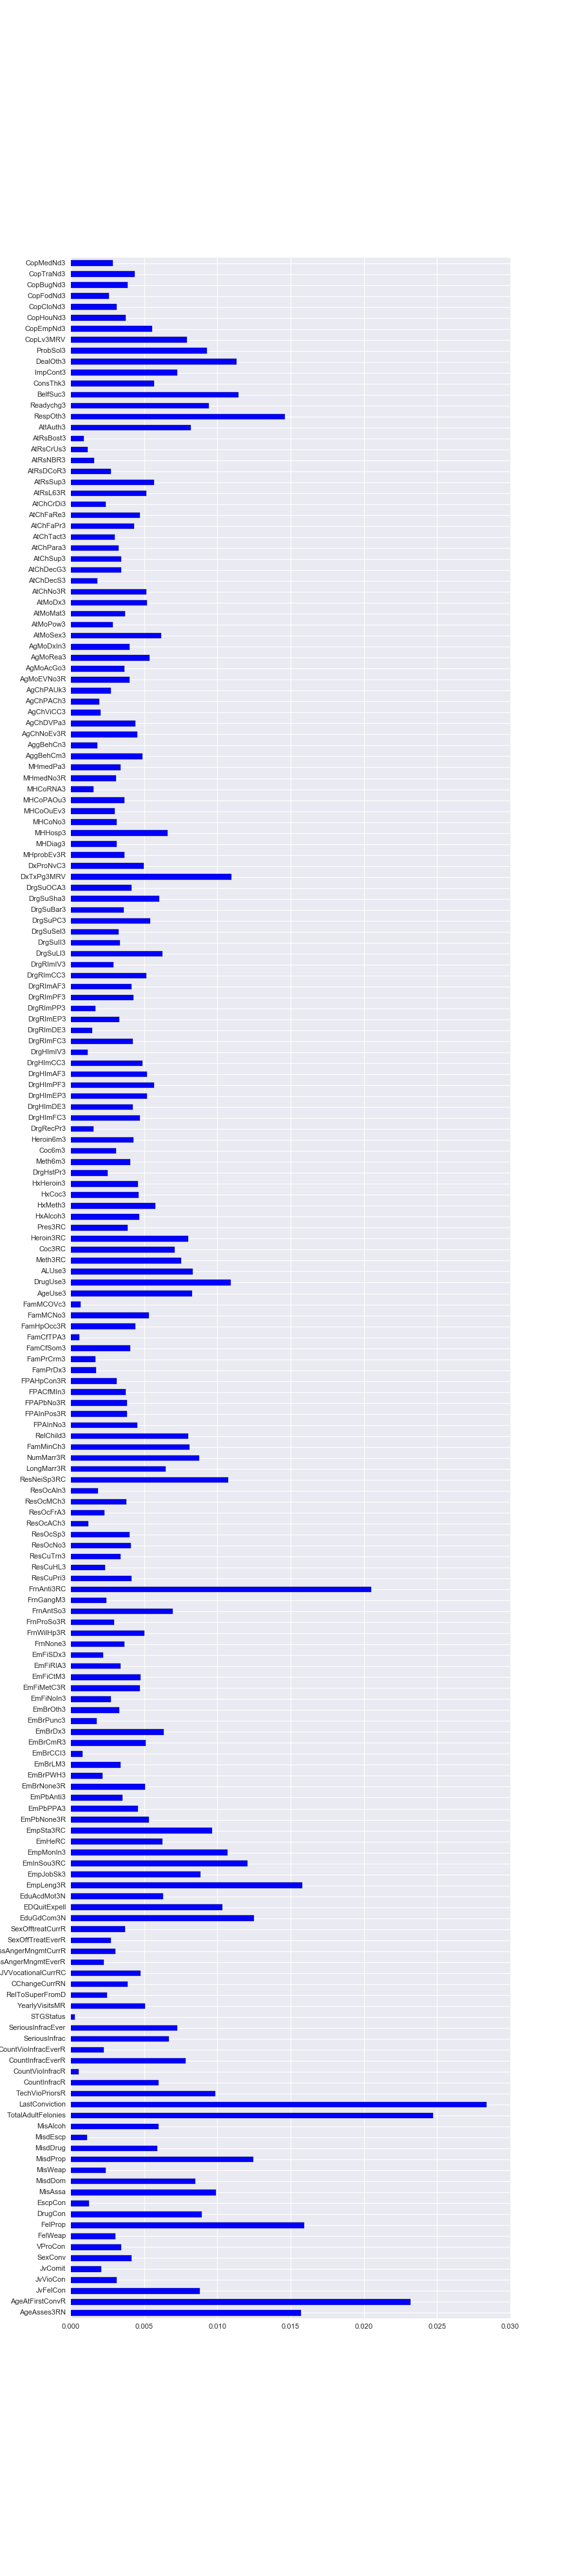

AgeAsses3RN            0.015698
AgeAtFirstConvR        0.023202
JvFelCon               0.008791
JvVioCon               0.003115
JvComit                0.002061
SexConv                0.004148
VProCon                0.003443
FelWeap                0.003051
FelProp                0.015908
DrugCon                0.008951
EscpCon                0.001235
MisAssa                0.009884
MisdDom                0.008490
MisWeap                0.002376
MisdProp               0.012435
MisdDrug               0.005897
MisdEscp               0.001105
MisAlcoh               0.005978
TotalAdultFelonies     0.024709
LastConviction         0.028380
TechVioPriorsR         0.009846
CountInfracR           0.005996
CountVioInfracR        0.000522
CountInfracEverR       0.007845
CountVioInfracEverR    0.002256
SeriousInfrac          0.006686
SeriousInfracEver      0.007255
STGStatus              0.000283
YearlyVisitsMR         0.005067
RelToSuperFromD        0.002443
                         ...   
AtChDecS

In [76]:
rforest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rforest.fit(X, y)
import matplotlib
%matplotlib nbagg
feature_importances = pd.Series(rforest.feature_importances_, index=X.columns)
#feature_importances.sort(ascending=True)
feature_importances.plot(kind="barh", figsize=(11,50))
feature_importances[:]

## Selecting Feature Variables

<IPython.core.display.Javascript object>


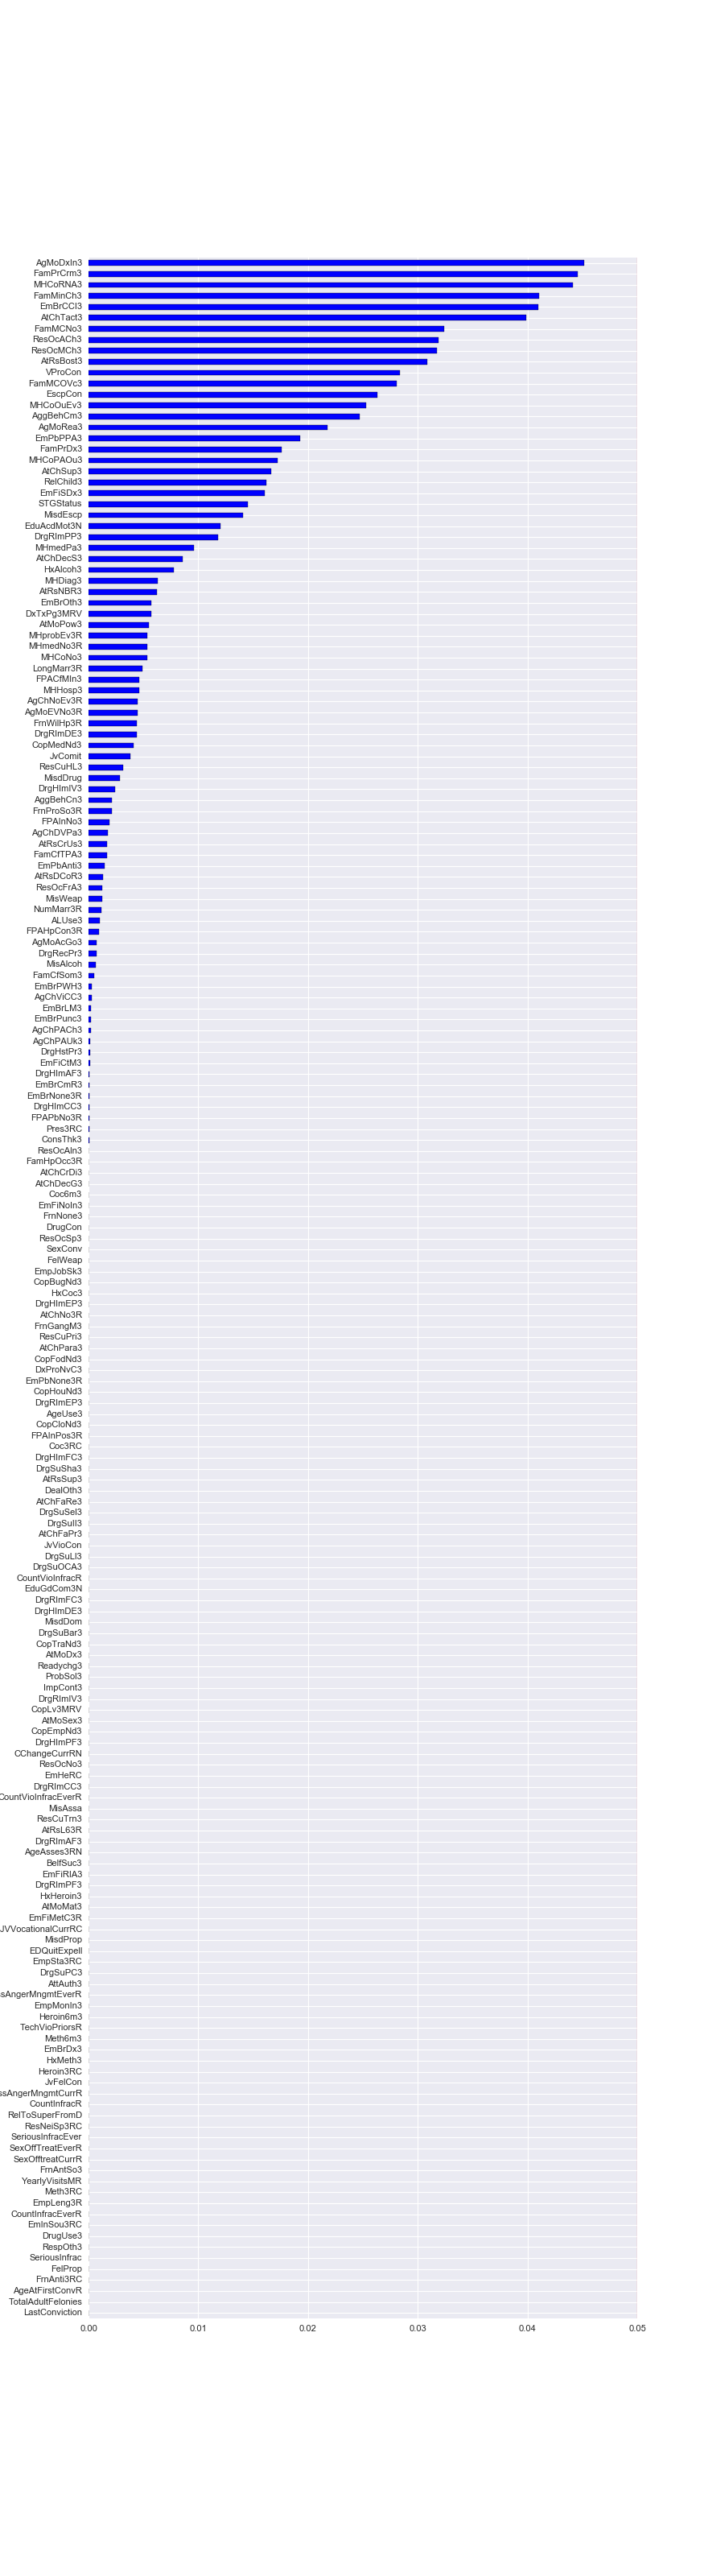

In [77]:
import matplotlib
%matplotlib nbagg
topfeatures = SelectKBest(chi2, k=all)
topfeatures = SelectFpr(chi2, alpha=0.05)

x_indices = np.arange(X.shape[-1])

selector = SelectFpr(f_classif, alpha=0.05)
selector.fit(X, y)

topindex = pd.Series(selector.pvalues_, index=X.columns)
topindex.sort_values(inplace=True)
topindex.plot(kind="barh", figsize=(11,40));
plt.axvline(x=0.05, ymin=0, ymax = 5, linewidth=1, color='red')


In [26]:
b = selector.pvalues_ < .05
b = pd.DataFrame(b)
b.rename(columns={0: 'sig'}, inplace=True)

Xcol = pd.DataFrame(X.columns)
bresult = pd.concat([b, Xcol], axis=1)
bresult.rename(columns={0: 'name'}, inplace=True)
bresult2 = bresult.loc[bresult['sig'] == True]
bresult2


,sig,name
0,True,AgeAsses3RN
1,True,AgeAtFirstConvR
2,True,JvFelCon
3,True,JvVioCon
4,True,JvComit
6,True,SexConv
7,True,VProCon
10,True,FelWeap
11,True,FelProp
12,True,DrugCon


In [27]:
bresult3 = bresult2["name"].tolist()
bresult3


['AgeAsses3RN',
 'AgeAtFirstConvR',
 'JvFelCon',
 'JvVioCon',
 'JvComit',
 'SexConv',
 'VProCon',
 'FelWeap',
 'FelProp',
 'DrugCon',
 'EscpCon',
 'MisAssa',
 'MisdDom',
 'MisWeap',
 'MisdProp',
 'MisdDrug',
 'MisdEscp',
 'MisAlcoh',
 'TotalAdultFelonies',
 'LastConviction',
 'TechVioPriorsR',
 'CountInfracR',
 'CountVioInfracR',
 'CountInfracEverR',
 'CountVioInfracEverR',
 'SeriousInfrac',
 'SeriousInfracEver',
 'STGStatus',
 'YearlyVisitsMR',
 'RelToSuperFromD',
 'CChangeCurrRN',
 'IJVVocationalCurrRC',
 'StressAngerMngmtEverR',
 'StressAngerMngmtCurrR',
 'SexOffTreatEverR',
 'SexOfftreatCurrR',
 'EduGdCom3N',
 'EDQuitExpell',
 'EduAcdMot3N',
 'EmpLeng3R',
 'EmpJobSk3',
 'EmInSou3RC',
 'EmpMonIn3',
 'EmHeRC',
 'EmpSta3RC',
 'EmPbNone3R',
 'EmPbPPA3',
 'EmPbAnti3',
 'EmBrNone3R',
 'EmBrPWH3',
 'EmBrLM3',
 'EmBrCCI3',
 'EmBrCmR3',
 'EmBrDx3',
 'EmBrPunc3',
 'EmBrOth3',
 'EmFiNoIn3',
 'EmFiMetC3R',
 'EmFiCtM3',
 'EmFiRIA3',
 'EmFiSDx3',
 'FrnNone3',
 'FrnWilHp3R',
 'FrnProSo3R',
 'FrnA

In [28]:
X = crimdata1[bresult3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
y_test.value_counts()
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
print scores

mse_scores = -scores
print mse_scores

rmse_scores = np.sqrt(mse_scores)
print rmse_scores

# calculate the average RMSE
print rmse_scores.mean()


[-0.20119357 -0.19634936 -0.19786875 -0.17547108 -0.19354442 -0.18525499
 -0.19521821 -0.18294565 -0.16670905 -0.17294014]
[ 0.20119357  0.19634936  0.19786875  0.17547108  0.19354442  0.18525499
  0.19521821  0.18294565  0.16670905  0.17294014]
[ 0.44854606  0.44311326  0.4448244   0.41889268  0.43993683  0.43041258
  0.44183505  0.42772146  0.4083002   0.41586072]
0.43194432551


# MODEL EVALUATIONS

## 1. Null Model 

The Models used are evaluated against the Null Model, which assumes that everyone will recommit a felony within three years.


In [29]:
start = time.time()
y_test.value_counts().head(1) / len(y_test)
nullmodel = DummyClassifier(strategy='most_frequent', random_state=99, constant=None)
nullmodel.fit(X,y)
y_pred_prob = nullmodel.predict_proba(X_test)[:, 1]
null_score_acc = nullmodel_mean1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
null_score_roc = nullmodel_scores1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_null = end - start

print "Accuracy with Null Model: " + str(null_score_acc)
print "ROC AUC with Null Model: " + str(null_score_roc)
print "Time: " + str(time_1_null)

Accuracy with Null Model: 0.70441370224
ROC AUC with Null Model: 0.5
Time: 0.11999297142


### 2. Logistic Regression Model

In [30]:
start = time.time()
lreg = LogisticRegression(random_state = 22, C=1e9)
lreg.fit(X,y)
lreg_scores_acc = cross_val_score(lreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
lreg_scores_roc = cross_val_score(lreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_logreg = end - start
print "Accuracy with Logistic Regression is: ", lreg_scores_acc
print "ROC AUC with Logistic Regression is :", lreg_scores_roc
print "Time = ", time_1_logreg

Accuracy with Logistic Regression is:  0.718187088274
ROC AUC with Logistic Regression is : 0.711461320204
Time =  5.01606178284


### 3. K Nearest-Neighbor Model

In [31]:
# Find an optimal value of K for KNN
k_range = range(1, 100)
k_scores_acc = []
k_scores_roc = []
start = time.time()
for k in k_range:
    knnopt = KNeighborsClassifier(n_neighbors=k)
    scores_acc = cross_val_score(knnopt, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores_acc.append(scores_acc.mean())
    scores_roc = cross_val_score(knnopt, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    k_scores_roc.append(scores_roc.mean())
end = time.time()
print "k_scores_acc: ", k_scores_acc
print "k_scores_roc: ", k_scores_roc
print "Time: " + str(end - start)


k_scores_acc:  [0.66811198945981554, 0.70692226613965747, 0.7014993412384718, 0.71489064558629778, 0.71673913043478255, 0.71635704874835304, 0.71489986824769436, 0.72215415019762852, 0.7141686429512516, 0.71886429512516459, 0.72001581027667994, 0.71999868247694332, 0.72795652173913028, 0.71960079051383397, 0.73085507246376813, 0.72181291172595519, 0.7279446640316205, 0.72871277997364958, 0.73015678524374183, 0.72325955204216075, 0.73052700922266145, 0.72869565217391297, 0.72906851119894611, 0.72869565217391297, 0.73379183135704884, 0.72904479578392622, 0.73086034255599475, 0.7279855072463769, 0.73342160737812911, 0.73084716732542809, 0.72868511198945984, 0.73049407114624509, 0.73303820816864307, 0.72830039525691703, 0.72867852437417657, 0.73050329380764167, 0.73341501976284584, 0.72867325428195007, 0.73159815546772067, 0.73156916996047427, 0.7319420289855072, 0.72977733860342542, 0.73376284584980245, 0.7326745718050065, 0.73086297760210805, 0.73196047430830036, 0.7355744400527009, 0.73

<IPython.core.display.Javascript object>


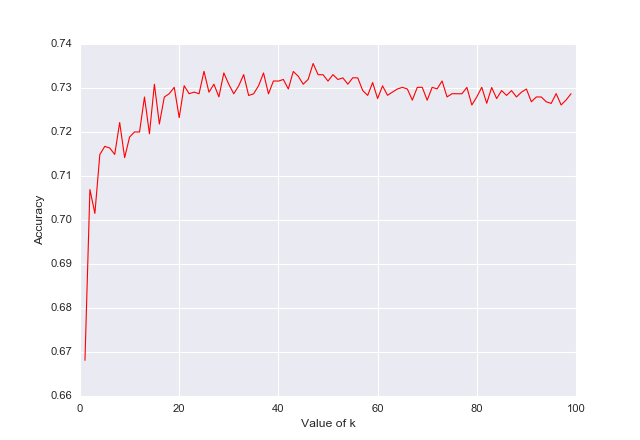

In [78]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores_acc, color = 'red', linewidth = 1)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')


<IPython.core.display.Javascript object>


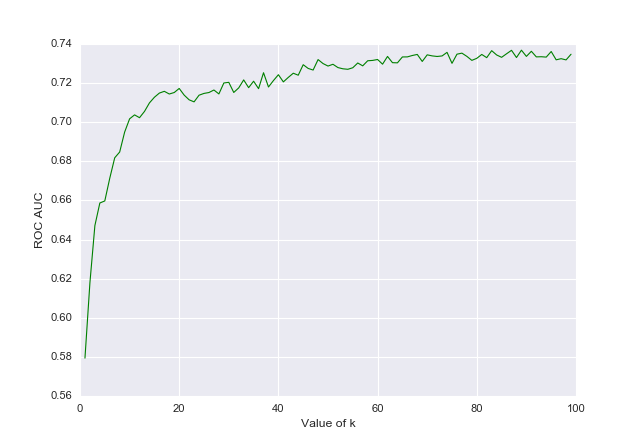

In [79]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores_roc, color = 'green', linewidth = 1)
plt.xlabel('Value of k')
plt.ylabel('ROC AUC')

Looks like the optimal value of k is 99 for both Accuracy and ROC AUC.

#### K Nearest-Neighbor Model with k=99

In [34]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=99)
knn_scores_acc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
knn = KNeighborsClassifier(n_neighbors=99)
knn_scores_roc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_knn = end - start
print "Accuracy with kNN with k=99: ", knn_scores_acc
print "Accuracy with kNN with k=99: ", knn_scores_roc
print "Time: " + str(time_1_knn)


Accuracy with kNN with k=99:  0.725039525692
Accuracy with kNN with k=99:  0.734429538381
Time: 4.32671809196


### 4. Naive-Bayes - Multinomial Model

In [35]:
start = time.time()
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores_acc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbm_scores_roc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbm = end - start
print "Accuracy with Naive-Bayes - Multinomial Model: ", nbm_scores_acc
print "ROC AUC with Naive-Bayes - Multinomial Model: ", nbm_scores_roc
print "Time: ", time_1_nbm


Accuracy with Naive-Bayes - Multinomial Model:  0.702938076416
ROC AUC with Naive-Bayes - Multinomial Model:  0.71799355526
Time:  0.169752120972


### 5. Naive-Bayes - Gaussian Model

In [36]:
start = time.time()
nbg = GaussianNB()
nbg.fit(X, y)
GaussianNB()
nbg_scores_acc = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbg_scores_roc = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbg = end - start
print "Accuracy with Naive-Bayes - Gaussian Model: ", nbg_scores_acc
print "ROC AUC with Naive-Bayes - Gaussian Model: ", nbg_scores_roc
print "Time: ",  time_1_nbg


Accuracy with Naive-Bayes - Gaussian Model:  0.700042160738
ROC AUC with Naive-Bayes - Gaussian Model:  0.704646644166
Time:  0.235029935837


### 6. Naive-Bayes - Bernoulli Model

In [37]:
start = time.time()
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb_scores_acc = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbb_scores_roc = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbb = end - start
print "Accuracy with Naive-Bayes - Gaussian Model: ", nbb_scores_acc
print "ROC AUC with Naive-Bayes - Gaussian Model: ", nbb_scores_roc
print "Time: ",  time_1_nbb

Accuracy with Naive-Bayes - Gaussian Model:  0.681180500659
ROC AUC with Naive-Bayes - Gaussian Model:  0.720221683337
Time:  0.291507959366


<IPython.core.display.Javascript object>


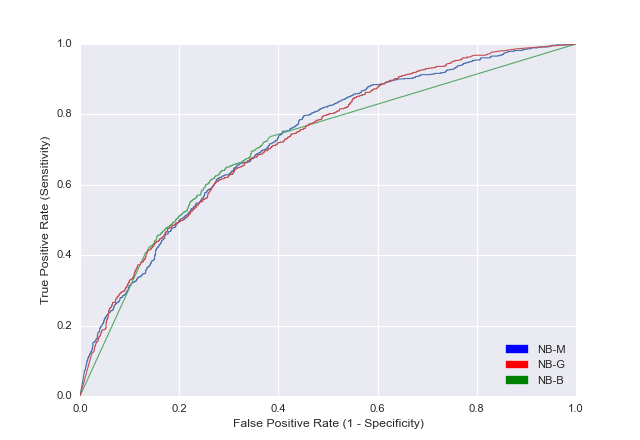

In [80]:
import matplotlib
%matplotlib nbagg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

nbm_preds = nbm.predict_proba(X)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y, nbm_preds)

nbg_preds = nbg.predict_proba(X)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y, nbg_preds)

nbb_preds = nbb.predict_proba(X)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, nbg_fpr, nbg_tpr, nbb_fpr, nbb_tpr, linewidth = 1.0)
#color='magenta', label='lr_auc=0.956')
#plt.plot(nbg_fpr, nbg_tpr, color='green')
#plt.plot(nbb_fpr, nbb_tpr, color='yellow')
blue_patch = mpatches.Patch(color='blue', label='NB-M')  
red_patch= mpatches.Patch(color='red', label='NB-G' )  
green_patch= mpatches.Patch(color='green', label='NB-B')  
plt.legend(handles=[blue_patch, red_patch, green_patch], loc=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

### 7. SVM Polynomial Kernel Model

In [39]:
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
end = time.time()
print svmpoly_scores
print "Time: " + str(end-start)

[ 0.68478261  0.72463768  0.69202899  0.68478261  0.68478261  0.65217391
  0.65217391  0.69090909  0.67636364  0.64363636]
Time: 16.5317721367


In [40]:
# search for an optimal gamma for SVM Polynomial Kernel Model
g_range = range(1, 10)
g_scores = []
start = time.time()
for k in g_range:
    knn = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

[0.68407509881422912, 0.67826613965744398, 0.67062582345191035, 0.67900131752305659, 0.67353623188405798, 0.67793280632411068, 0.6862516469038209, 0.67281291172595525, 0.68624769433465094]
Time: 139.049561024


<IPython.core.display.Javascript object>


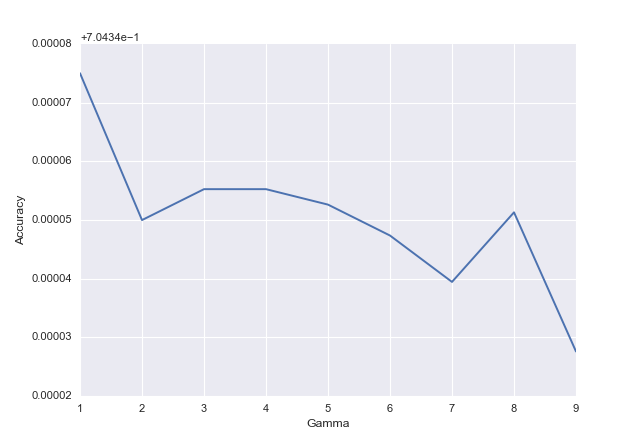

In [81]:
import matplotlib
%matplotlib nbagg
plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [42]:
# SVM Polynomial with optimized gamma
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=8)
svmpoly.fit(X,y)
svmpoly_acc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmpoly_roc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_svmpoly = end - start
print "SVM Polynomial with optimized gamma (=8) for accuracy: " + str(svmpoly_acc)
print "SVM Polynomial with optimized gamma (=8) for ROC AUC: " + str(svmpoly_roc)
print "Time: " + str(time_1_svmpoly)

SVM Polynomial with optimized gamma (=8) for accuracy: 0.68952173913
SVM Polynomial with optimized gamma (=8) for ROC AUC: 0.630930511809
Time: 34.1149330139


### 8. SVM Gaussian Kernel Model

In [43]:
svmg = svm.SVC(kernel='rbf', gamma=2)
svmg.fit(X,y)
svmg_scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmg_scores

[ 0.69202899  0.71376812  0.71376812  0.73913043  0.69565217  0.69202899
  0.65942029  0.70181818  0.69818182  0.73818182]


In [44]:
# search for an optimal gamma for SVM Gaussian Kernel Model
start = time.time()
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmg = svm.SVC(kernel='rbf', gamma=k)
    scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

[0.70441501976284582, 0.7043899868247695, 0.70439525691699623, 0.704395256916996, 0.70439262187088281, 0.70438735177865608, 0.70437944664031615, 0.70439130434782604, 0.70436758893280638]
Time: 126.984066963


<IPython.core.display.Javascript object>


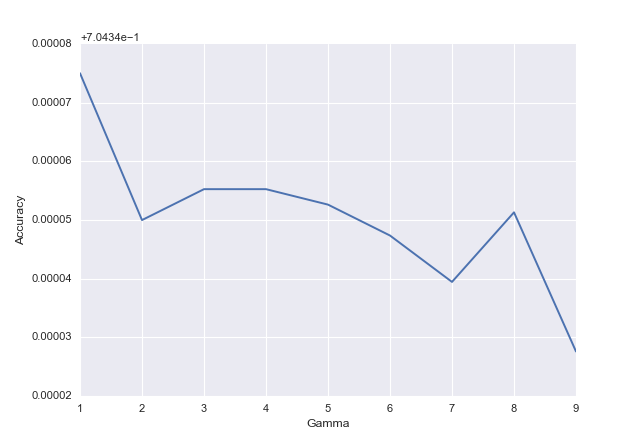

In [82]:
import matplotlib
%matplotlib nbagg

plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [46]:
start = time.time()
svmrbf = svm.SVC(kernel='rbf', gamma=8)
svmrbf.fit(X,y)
svmrbf_acc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmrbf_roc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_svmrbf = end - start
print "Accuracy of SVM Gaussian Model with gamma=8 : " + str(svmrbf_acc)
print "ROC AUC of SVM Gaussian Model with gamma=8 : " + str(svmrbf_roc)
print "Time for SVM Gaussian Model with gamma=8 : " + str(time_1_svmrbf)

Accuracy of SVM Gaussian Model with gamma=8 : 0.704367588933
ROC AUC of SVM Gaussian Model with gamma=8 : 0.505499783212
Time for SVM Gaussian Model with gamma=8 : 29.4507379532


### 9. Decision Tree Classifier Model

In [47]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
dtc_range = range(1, 40)
dtc_scores_acc = []
dtc_scores_roc = []
for k in dtc_range:
    dtc = DecisionTreeClassifier(random_state = 22, max_depth=k)
    dtc_scores_a = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
    dtc_scores_acc.append(dtc_scores_a.mean())
    dtc_scores_r = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    dtc_scores_roc.append(dtc_scores_r.mean())
end = time.time()
print "Accuracy of Decision Tree Classifier Model : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model : " + str(dtc_scores_roc)
print "Time: " +str(end-start)

Accuracy of Decision Tree Classifier Model : [0.70437549407114619, 0.69787220026350461, 0.71382608695652172, 0.69386561264822133, 0.7007549407114626, 0.70985375494071146, 0.70330171277997366, 0.70040316205533604, 0.68734255599472993, 0.67391831357048748, 0.66666139657444012, 0.6695757575757576, 0.66194202898550736, 0.65577997364953888, 0.64489328063241103, 0.64453096179183134, 0.66305138339920944, 0.65144664031620558, 0.64563768115942033, 0.63801317523056655, 0.64597891963109344, 0.63731093544137019, 0.64381818181818173, 0.64564953886693011, 0.63585243741765485, 0.64924110671936763, 0.65541106719367592, 0.62751383399209482, 0.6332964426877471, 0.64600790513834006, 0.64125428194993417, 0.64344664031620558, 0.64745849802371536, 0.65068642951251632, 0.65178656126482204, 0.64925955204216068, 0.64090118577075095, 0.65324242424242418, 0.64782740447957843]
ROC AUC of Decision Tree Classifier Model : [0.63551942364878233, 0.67281129397927708, 0.67090361878907889, 0.68434296606395617, 0.6876037

<IPython.core.display.Javascript object>


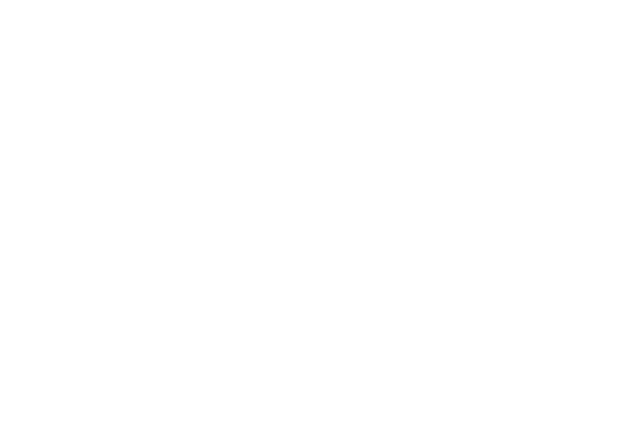

In [49]:
import matplotlib
%matplotlib nbagg
plt.plot(dtc_range, dtc_scores_roc)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('ROC AUC')

#### Seems the best result happens at depth=3

In [50]:
start = time.time()
dtc = DecisionTreeClassifier(random_state = 22, max_depth=3)
dtc.fit(X,y)
dtc_scores_acc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
dtc_scores_auc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_DTC_opt = end-start
print "Accuracy of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_auc)
print "Time: " +str(time_1_DTC_opt)

Accuracy of Decision Tree Classifier Model with optimal depth (=3) : 0.714537549407
ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : 0.684904043949
Time: 0.374181985855


### 10. Decision Tree Bagging Classification Method

In [51]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
bag_scores_acc = []
bag_scores_roc = []
bag_scores_mse = []
bag = BaggingClassifier(max_samples = 1000, random_state = 22)
bag_range = range(1, 50)
for k in bag_range:
    bag_cl = BaggingClassifier(bag, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_cl.fit(X, y)
    bag_scores_a = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores_m = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    bag_scores_r = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc') 
    bag_scores_acc.append(bag_scores_a.mean())
    bag_scores_mse.append(np.mean(np.sqrt(-bag_scores_m)))
    bag_scores_roc.append(bag_scores_r.mean())
end = time.time()

print bag_scores_acc
print bag_scores_roc
print bag_scores_mse
print "Time: " + str(end-start)

[0.70149802371541503, 0.7134703557312253, 0.71163768115942028, 0.7084071146245059, 0.71130830039525694, 0.71200131752305662, 0.71128985507246389, 0.71092753623188398, 0.71092621870882733, 0.70908695652173903, 0.71017654808959163, 0.71127009222661397, 0.7079934123847168, 0.70839130434782605, 0.705501976284585, 0.70799604743083011, 0.70838471673254266, 0.70657444005270087, 0.7098471673254283, 0.71237417654808954, 0.71056126482213433, 0.70800395256916993, 0.70693017127799729, 0.70546903820816875, 0.70620158102766806, 0.70616600790513828, 0.70511594202898542, 0.70511725955204219, 0.70474440052700926, 0.70693017127799729, 0.70618972332015806, 0.70621212121212129, 0.70548748353096191, 0.70694334650856383, 0.70730566534914363, 0.70475889328063235, 0.70692490118577067, 0.70657575757575752, 0.70618577075098821, 0.70619894598155464, 0.70585111989459814, 0.70691831357048751, 0.70838471673254277, 0.70584321475625822, 0.70691304347826089, 0.70617654808959152, 0.70619631093544133, 0.7058471673254282

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(bag_range, bag_scores_mse)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

In [53]:
start = time.time()
bag = BaggingClassifier(max_samples = 1000, random_state = 22)
bag_cl = BaggingClassifier(bag, n_estimators=2, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
bag_cl.fit(X, y)
bag_scores_acc = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
bag_scores_mse = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error').mean()
bag_scores_roc = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean() 
end = time.time()
time_1_BagDTC_opt = end-start
print "Accuracy of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_acc)
print "ROC AUC of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_roc)
print "RMSE of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_mse)
print "Time: " +str(time_1_BagDTC_opt)

Accuracy of Decision Tree Bagging Classification Method with optimal Estimator (=2) : 0.722166007905
ROC AUC of Decision Tree Bagging Classification Method with optimal Estimator (=2) : 0.718498892914
RMSE of Decision Tree Bagging Classification Method with optimal Estimator (=2) : -0.278212121212
Time: 12.9941802025


### 11. Random Forest Model

In [55]:
start = time.time()
rf_results = []
leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print str(min_samples) + ": C-stat: "+ str(roc)
    rf_results.append(roc)

end = time.time()
print "Time = " + str(end - start)

1: C-stat: 0.733712309938
2: C-stat: 0.736624037023
3: C-stat: 0.737600468101
4: C-stat: 0.735288666609
5: C-stat: 0.739778864987
6: C-stat: 0.739874414271
7: C-stat: 0.741769190922
8: C-stat: 0.739728935713
9: C-stat: 0.739161557055
10: C-stat: 0.739874415176
11: C-stat: 0.740480054713
12: C-stat: 0.738438861552
13: C-stat: 0.73773470312
14: C-stat: 0.740864933099
15: C-stat: 0.741742343509
16: C-stat: 0.742598421258
17: C-stat: 0.73828131951
18: C-stat: 0.739101418275
19: C-stat: 0.738636148951
20: C-stat: 0.738817215515
21: C-stat: 0.744492287824
22: C-stat: 0.740725073761
23: C-stat: 0.736049078538
24: C-stat: 0.738176194833
25: C-stat: 0.737616670392
Time = 95.804931879


In [56]:
# Find Optimal Depth 
start = time.time()
r_range = range(1, 50)
rf_scores_acc = []
rf_scores_roc = []

for k in r_range:
    rfc = RandomForestClassifier(max_depth=k)
    rf_scores_a = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rf_scores_acc.append(rf_scores_a.mean())
    rf_scores_r = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    rf_scores_roc.append(rf_scores_r.mean())
print rf_scores_acc
print rf_scores_roc
end = time.time()
print "Time = " + str(end - start)

[0.70438208168642957, 0.7145362318840579, 0.7217694334650856, 0.72069960474308303, 0.72615942028985514, 0.73376152832674579, 0.73013702239789191, 0.71887878787878789, 0.7210711462450593, 0.717090909090909, 0.71344005270092226, 0.70508300395256929, 0.708737812911726, 0.70948748353096169, 0.7051172595520423, 0.71055204216073786, 0.70620816864295111, 0.70872727272727265, 0.7087233201581028, 0.71418313570487479, 0.70767325428194994, 0.70837417654808954, 0.70548221343873518, 0.71021343873517795, 0.71562845849802381, 0.70511198945981557, 0.71418840579710152, 0.71635046113306977, 0.7091080368906455, 0.70764690382081696, 0.71380237154150195, 0.71818577075098822, 0.71815151515151521, 0.71238603425559943, 0.71418577075098821, 0.71346508563899858, 0.71200527009222658, 0.71202766798418959, 0.70438998682476939, 0.70074967061923576, 0.71491567852437421, 0.71236100131752289, 0.71633860342555988, 0.71088537549407105, 0.71382476943346496, 0.70873122529644272, 0.71526745718050067, 0.70691831357048751, 0

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(r_range, rf_scores_acc)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

<IPython.core.display.Javascript object>


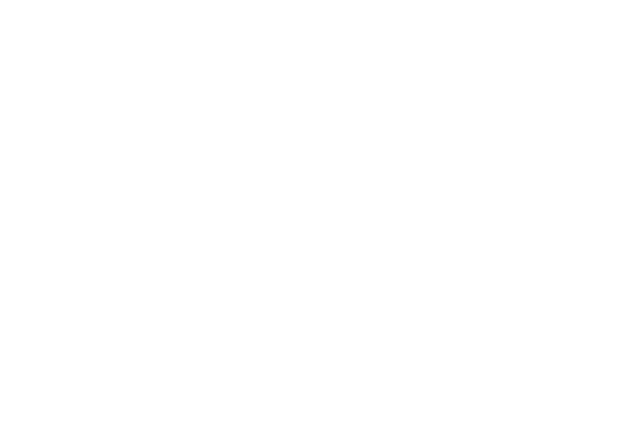

In [58]:
import matplotlib
%matplotlib nbagg
plt.plot(r_range, rf_scores_roc)
plt.xlabel('Depth')
plt.ylabel('ROC AUC')

In [59]:
# Optimizing for maximum number of features
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    rfc = RandomForestClassifier(n_estimators=44, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    rfc.fit(X, y)
    roc = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option: C-stat = ", roc
    results.append(roc)

    

auto option: C-stat =  0.721457585417
None option: C-stat =  0.721630217283
sqrt option: C-stat =  0.714671092914
log2 option: C-stat =  0.723215824339
0.9 option: C-stat =  0.714783226941
0.2 option: C-stat =  0.727917696087


In [60]:
# Re-run with optimized parameters
start = time.time()
rfc = RandomForestClassifier(n_estimators=44, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=5, random_state=42)
rfc.fit(X, y)
rf_scores_acc = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
rfc = RandomForestClassifier(n_estimators=44, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=21, random_state=42)
rfc.fit(X, y)
rf_scores_roc = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_rf = end - start
print "Accuracy of Random Forest Classification Method with optimized parameters : " + str(rf_scores_acc)
print "ROC AUC of Random Forest Classification Method with optimized parameters : " + str(rf_scores_roc)
print "Time: " +str(time_1_rf)

Accuracy of Random Forest Classification Method with optimized parameters : 0.731570487484
ROC AUC of Random Forest Classification Method with optimized parameters : 0.734232180862
Time: 3.68463778496


### 13. Bagged Random Forest Model

In [61]:
brf_range = range(1, 20)
brf_scores_acc = []
brf_scores_roc = []
for k in brf_range:
    brf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=5, random_state=42)
    brf.fit(X, y)
    brf_scores_a = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    brf_scores_acc.append(brf_scores_a.mean())
    brf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=21, random_state=42)
    brf.fit(X, y)
    brf_scores_r = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    brf_scores_roc.append(brf_scores_r.mean())

print brf_scores_acc
print brf_scores_roc


[0.64926877470355726, 0.66774835309617919, 0.68878392621870876, 0.70294071146245063, 0.71379710144927533, 0.72360474308300404, 0.71346772068511188, 0.7170711462450593, 0.72145718050065877, 0.71817259552042167, 0.71671541501976288, 0.72652305665349148, 0.72070619235836619, 0.72071936758893274, 0.72761660079051382, 0.71782345191040842, 0.72828326745718053, 0.73231752305665343, 0.72180500658761526]
[0.64030754601948281, 0.68067323958673676, 0.70245760286838932, 0.71363670218063036, 0.70884559979409756, 0.72331403746027945, 0.72323251133606214, 0.72486447066934401, 0.72666297000625713, 0.72413443331293059, 0.72742383117605947, 0.72999363063445433, 0.72686468377500457, 0.73102047551423799, 0.72963166338703167, 0.7310969383596484, 0.728199069335141, 0.73018021785328446, 0.73144320553746611]


/Volumes/UnivIdaho/Anaconda/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [ ]:
import matplotlib
%matplotlib nbagg

plt.plot(brf_range, brf_scores_acc)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')

<IPython.core.display.Javascript object>


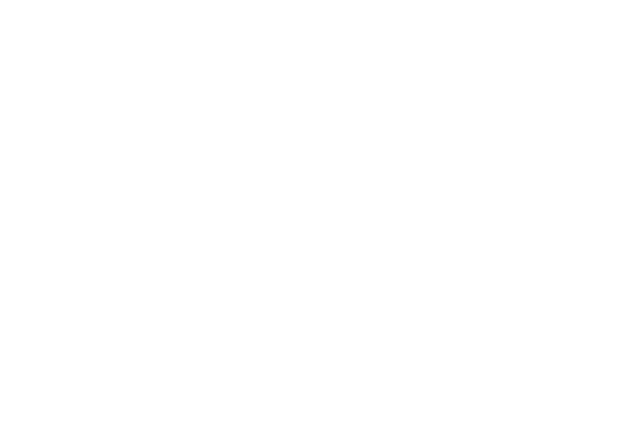

In [63]:
import matplotlib
%matplotlib nbagg

plt.plot(brf_range, brf_scores_roc)
plt.xlabel('N Estimators')
plt.ylabel('ROC AUC')

In [64]:
start = time.time()
brf = RandomForestClassifier(n_estimators=21, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=14, random_state=42)
brf.fit(X, y)
brf_scores_acc = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
brf = RandomForestClassifier(n_estimators=21, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=18, random_state=42)
brf.fit(X, y)
brf_scores_roc = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_BRF = end - start
print "Accuracy of Bagged Random Forest Classification Method with optimized parameters : " + str(brf_scores_acc)
print "ROC AUC of Bagged Random Forest Classification Method with optimized parameters : " + str(brf_scores_roc)
print "Time: " +str(time_1_BRF)

Accuracy of Bagged Random Forest Classification Method with optimized parameters : 0.729408432148
ROC AUC of Bagged Random Forest Classification Method with optimized parameters : 0.734485717239
Time: 1.42337608337


### 13. Extra Tree Classifier Model

In [65]:
start = time.time()
extree = ExtraTreesClassifier(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 7)
extree_scores_acc = cross_val_score(extree, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring = 'accuracy').mean()
extree_scores_roc = cross_val_score(extree, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring = 'roc_auc').mean()
end = time.time()
time_1_ExTree = end - start
print "Accuracy of Extra Tree Classification Method : " + str(extree_scores_acc)
print "ROC AUC of Extra Tree Classification Method : " + str(extree_scores_roc)
print "Time: " +str(time_1_ExTree)

Accuracy of Extra Tree Classification Method : 0.719613965744
ROC AUC of Extra Tree Classification Method : 0.712766900795
Time: 0.540987968445


### Results for Dataset 1

<IPython.core.display.Javascript object>


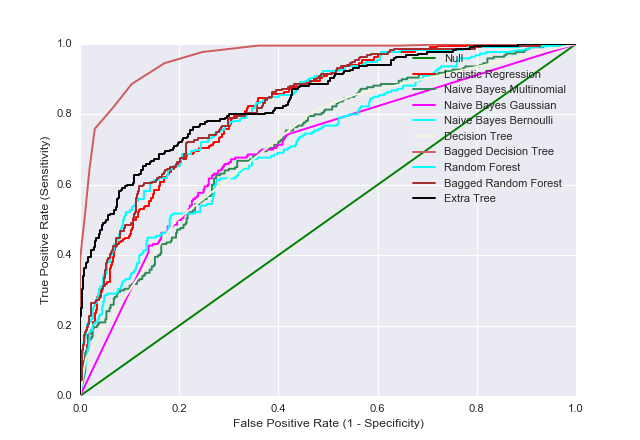

In [74]:
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

nullmodel_preds = nullmodel.predict_proba(X_test)[:,1]
nullmodel_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel_preds)

lreg.fit(X,y)
lreg_preds = lreg.predict_proba(X_test)[:,1]
lreg_fpr, lreg_tpr, _ = metrics.roc_curve(y_test, lreg_preds)

#knn.fit(X,y)
#knn_preds = knn.predict_proba(X_test)[:,1]
#knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_preds)

nbm.fit(X,y)
nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg.fit(X,y)
nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb.fit(X,y)
nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

#svmpoly.fit(X,y)
#svmpoly_preds = svmpoly.predict_proba(X_test)[:,1]
#svmpoly_fpr, svmpoly_tpr, _ = metrics.roc_curve(y_test, svmpoly_preds)

#svmrbf.fit(X,y)
#svmpoly_preds = svmrbf.predict_proba(X_test)[:,1]
#svmrbf_fpr, svmrbf_tpr, _ = metrics.roc_curve(y_test, svmrbf_preds)

dtc.fit(X,y)
dtc_preds = dtc.predict_proba(X_test)[:,1]
dtc_fpr, dtc_tpr, _ = metrics.roc_curve(y_test, dtc_preds)

bag_cl_preds = bag_cl.predict_proba(X_test)[:,1]
bag_fpr, bag_tpr, _ = metrics.roc_curve(y_test, bag_cl_preds)

rfc_preds = rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, _ = metrics.roc_curve(y_test, rfc_preds)

brf_preds = brf.predict_proba(X_test)[:,1]
brf_fpr, brf_tpr, _ = metrics.roc_curve(y_test, brf_preds)

extree.fit(X,y)
extree_preds = extree.predict_proba(X_test)[:,1]
extree_fpr, extree_tpr, _ = metrics.roc_curve(y_test, extree_preds)

plt.plot(nullmodel_fpr, nullmodel_tpr, label='Null', color='green') # Null Model
plt.plot(lreg_fpr, lreg_tpr, label='Logistic Regression', color='red') # Logistic Regression
#plt.plot(knn_fpr, knn_tpr, label='KNN', color='blue') # kNN
plt.plot(nbm_fpr, nbm_tpr, label='Naive Bayes Multinomial', color='seagreen') # Naive Bayes - Multinomial
plt.plot(nbg_fpr, nbg_tpr, label='Naive Bayes Gaussian', color='magenta') # Naive Bayes - Gaussian
plt.plot(nbb_fpr, nbb_tpr, label='Naive Bayes Bernoulli', color='cyan') # Naive Bayes - Bernoulli
#plt.plot(svmpoly_fpr, svmpoly_tpr, label='SVM Polynomial', color='LimeGreen') # Naive Bayes - Bernoulli
#plt.plot(svmrbf_fpr, svmrbf_tpr, label='SVM Gaussian', color='CadmiumYellowLight') # Naive Bayes - Bernoulli
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree', color='Beige') # Decision Tree Classification
plt.plot(bag_fpr, bag_tpr, label='Bagged Decision Tree', color='indianred') # Bagged Decision Tree
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest', color='Aqua') #Bagged Random Forest
plt.plot(brf_fpr, brf_tpr, label='Bagged Random Forest', color='brown') #Bagged Random Forest
plt.plot(extree_fpr, extree_tpr, label='Extra Tree', color='black') #Extra Tree


plt.legend()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

<IPython.core.display.Javascript object>


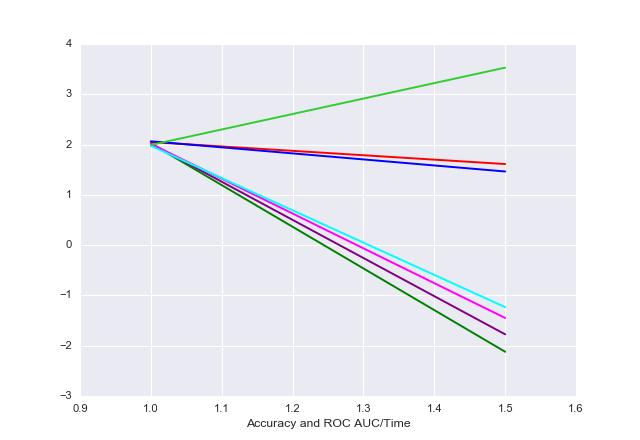

In [75]:
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

plt.plot([1, 1.5], [exp(null_score_acc), log(time_1_null)], label='Null Model', color='green')
plt.plot([1, 1.5], [exp(lreg_scores_acc), log(time_1_logreg)], label='Logistic Regression', color='red')
plt.plot([1, 1.5], [exp(knn_scores_acc), log(time_1_knn)], label='KNN', color='blue')
plt.plot([1, 1.5], [exp(nbm_scores_acc), log(time_1_nbm)], label='Naive Bayes - Multinomial', color='purple')
plt.plot([1, 1.5], [exp(nbg_scores_acc), log(time_1_nbg)], label='Naive Bayes - Gaussian', color='magenta')
plt.plot([1, 1.5], [exp(nbb_scores_acc), log(time_1_nbb)], label='Naive Bayes - Bernoulli', color='cyan')
plt.plot([1, 1.5], [exp(svmpoly_acc), log(time_1_svmpoly)], label='SVM Polynomial', color='LimeGreen')
plt.plot([1, 1.5], [exp(svmrbf_acc), log(time_1_svmrbf)], label='SVM Gaussian', color='CadmiumYellowLight')
plt.plot([1, 1.5], [exp(dtc_scores_acc), log(time_1_DTC_opt)], label='Decision Tree Classification', color='Beige')
plt.plot([1, 1.5], [exp(bag_scores_acc), log(time_1_BagDTC_opt)], label='Decision Tree Bagging', color='indianred')
plt.plot([1, 1.5], [exp(rf_scores_acc), log(time_1_rf)], label='Random Forest', color='Aqua')
plt.plot([1, 1.5], [exp(brf_scores_acc), log(time_1_BRF)], label='Random Forest Bagging', color='brown')
plt.plot([1, 1.5], [exp(extree_scores_acc), log(time_1_ExTree)], label='Extra Trees Classification', color='black')

pylab.xlim([0.9 , 1.6])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('Accuracy and ROC AUC/Time')